In [90]:
import pandas as pd
import seaborn as sns
import random as rd
import numpy as np
import cmath as c
import statistics as st
import matplotlib.pyplot as plt
lst1=[]
csv=pd.read_csv("Liczby.csv")
i=0
for i in range(20):
    lst=csv.loc[i]

    lst1.append(lst)
lst2=[]
# print(lst1)
def maxImin( list, pocz, kon):
    # list = rd.sample(list1, len(list1))
    maxlist = [[] for _ in range(kon-1)]
    minList = [[] for _ in range(kon-1)]
    for i in range(kon-1):
            if isinstance(list[0][i], (int, float)):
                maxlist[i].append(list[0][i])
                minList[i].append(list[0][i])
   
    for i in range(len(list)):
            for j in range(kon-1):
                if isinstance(list[i][j], (int, float)):
                    if list[i][j] > maxlist[j][-1]:
                        maxlist[j][-1] = list[i][j]
                    if list[i][j] < minList[j][-1]:
                        minList[j][-1] = list[i][j]
    
    for i in range(len(list)):
            for j in range(kon-1):
                if isinstance(list[i][j], (int, float)):
                    list[i][j] = (list[i][j] - minList[j][-1]) / (maxlist[j][-1] - minList[j][-1])
                # else:
                    # print(list[i][j],"<->")
    # print(list)
    return(list)  
ln=len(lst1[0]) 
lsta=maxImin(lst1,0,ln) 

In [12]:
# https://www.kaggle.com/code/hosammhmdali/digit-recognizer-cnn-98-25-accuracy to jest o cnn - convolution neural network
labels = csv.pop('label')
labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

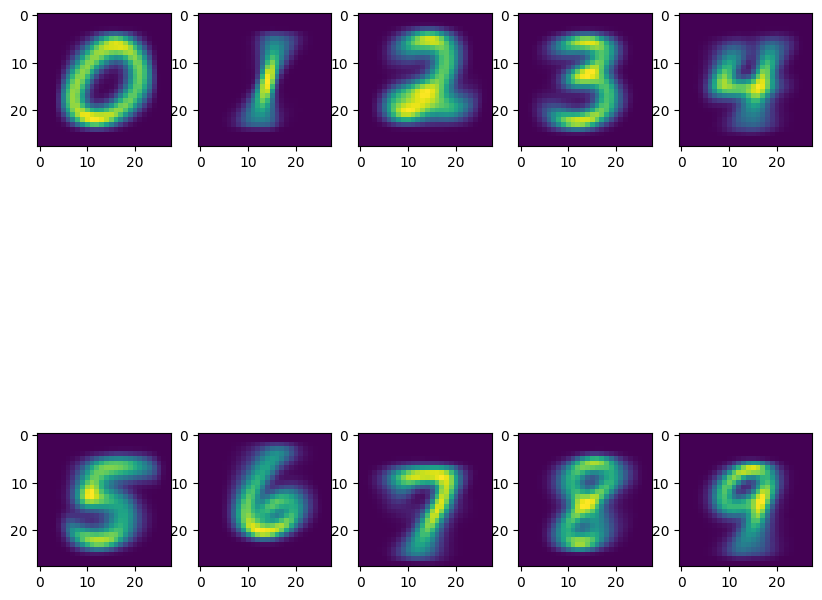

In [103]:
# "idealnie uśrednione liczby" i ich reprezentacja graficzna
def scale(x):
    return x.astype('float32')/255.0


def prep(x):
    x=scale(x)
    x=x.values.reshape(-1,28,28,1)
    return x


avg_numbers=[]
for num in range(10):
    number =csv.loc[csv['label']==num].copy()
    number.pop('label')
    avg_number=[]
    for i in range(784):
        avg_number.append( number[f"{i}"].mean())
    
    avg_numbers.append(avg_number)
    
avg_numbers_df=pd.DataFrame(avg_numbers)
digits = prep(avg_numbers_df)

fig,axes = plt.subplots(2,5,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits[i])
